In [17]:
import tensorflow as tf
import numpy as np

import PIL.Image
import IPython.display as display

In [31]:
raw_image_dataset = tf.data.TFRecordDataset('data/processed/4_channel_categorical.validation.tfrecords', compression_type="GZIP")
raw_image_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [32]:
image_feature_description = {
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/channels': tf.io.FixedLenFeature([], tf.int64),
    'image/label/name': tf.io.FixedLenFeature([], tf.string),
    'image/label/value': tf.io.FixedLenFeature([], tf.int64),
    'image/data': tf.io.FixedLenFeature([], tf.string),
    'forces/data': tf.io.FixedLenFeature([], tf.string)
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

In [33]:
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {forces/data: (), image/channels: (), image/data: (), image/height: (), image/label/name: (), image/label/value: (), image/width: ()}, types: {forces/data: tf.string, image/channels: tf.int64, image/data: tf.string, image/height: tf.int64, image/label/name: tf.string, image/label/value: tf.int64, image/width: tf.int64}>

tf.Tensor(50, shape=(), dtype=int64)


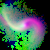

In [35]:
for image_features in parsed_image_dataset:
    decoded_image = tf.io.decode_raw(image_features["image/data"], tf.float32)
    decoded_image = tf.reshape(decoded_image, [50, 50, 4])
    
    print(image_features["image/height"])
    
#     print(decoded_image[0])
    _3_channels = decoded_image[:,:,0:3].numpy() * 255
    _3_channels = _3_channels.astype(np.uint8)
    display.display(PIL.Image.fromarray(_3_channels))
    break